In [239]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

In [240]:
import filtering_util
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

# Filtering gaze data
This exercise introduces different techniques for processing and analyzing gaze data using filtering. In particular the exercise removing noise and identifying fixations and saccades in the signal. A _fixation_ is defined as an instance with little or no eye movement. A _saccade_ is an eye movement between two fixations as illustrated in [Figure 1](#fix_sacc) for an example (image from [researchGate](https://www.researchgate.net/publication/356796000_TECHNICAL_MANUALS_READING_STRATEGIES_OF_PRIMARY_TEACHER_TRAINESS/figures?lo=1)
).
<div class="has-text-centered">
<figure class="image is-inline-block" id="fix_sacc">

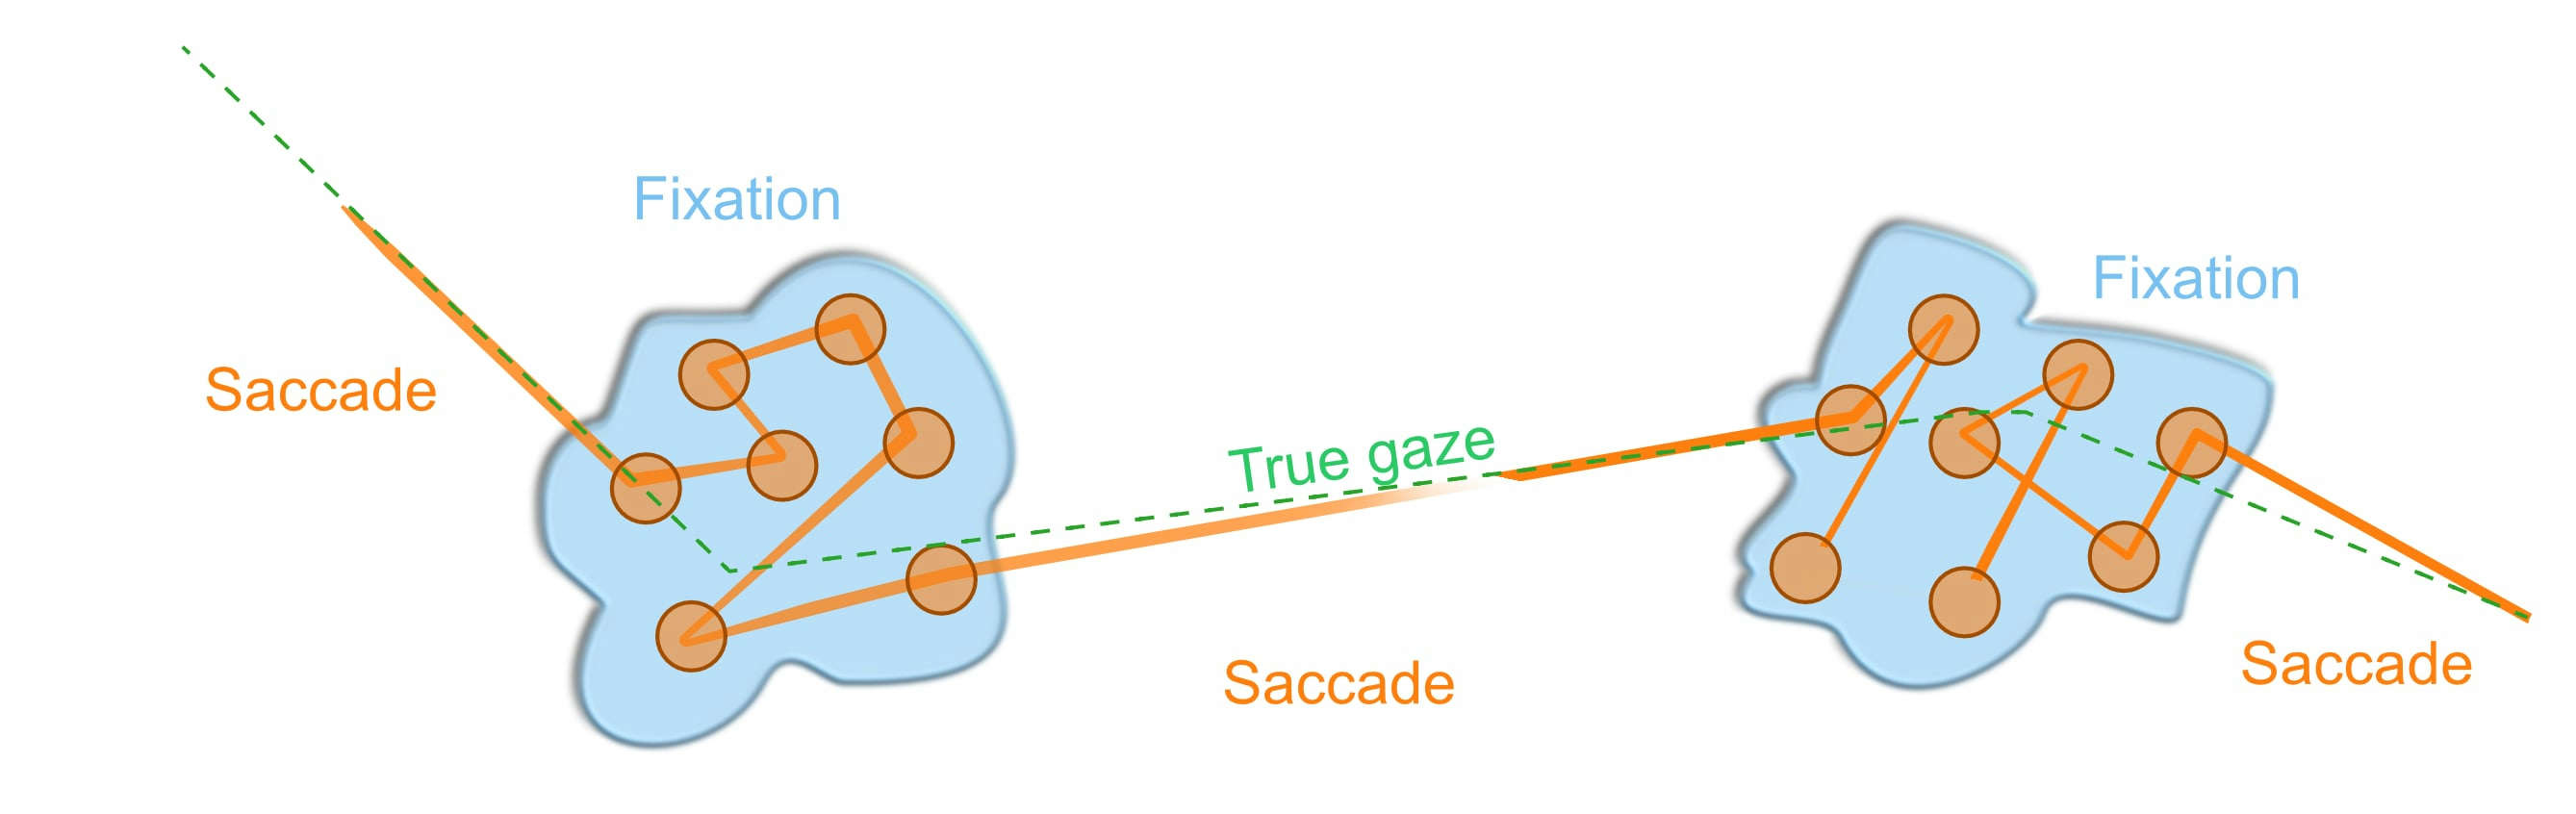

<figcaption class="figure-caption has-text-centered">Figure 1: Fixation and saccades in gaze data.
</figcaption>
</figure>
</div>
The visualizations presented throughout the exercise are based on data collected from `test_subject_1`
 using the `grid`
 pattern.
The exercise contains functions in the `filtering_util.py`
 file to create plots. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#task_load_data">Task 1: Load the data</a>
            </li>
            <li>
            <a href="#task_gauss1">Task 2: Gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss2">Task 3: Implementing gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss3">Task 4: Reflect on applying gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss4">Task 5: Partial derivatives</a>
            </li>
            <li>
            <a href="#partial1">Task 6: Calculate the derivatives</a>
            </li>
            <li>
            <a href="#partial2">Task 7: Derivatives of a signal</a>
            </li>
            <li>
            <a href="#partial3">Task 8: Saccade detection</a>
            </li>
            <li>
            <a href="#partial4">Task 9: Saccade detection</a>
            </li>
            <li>
            <a href="#fixations1">Task 10: Fixation detection</a>
            </li>
            <li>
            <a href="#fixations2">Task 11: Visualization of signals</a>
            </li>
            <li>
            <a href="#fixation3">Task 12: Noise handling during fixations</a>
            </li>
            <li>
            <a href="#fixation4">Task 13: Frame grouping</a>
            </li>
            <li>
            <a href="#results1">Task 14: Evaluate</a>
            </li>
            <li>
            <a href="#owndata">Task 15: Combined signal</a>
            </li>
            <li>
            <a href="#combined1">Task 16: Combined signal</a>
            </li>
            <li>
            <a href="#combined2">Task 17: Reflect</a>
            </li>
        </ul>
    </div>
</article>

**Note:** Although the number of tasks is substantial, each requires minimal programming effort, with many tasks primarily necessitating reflection on the outcomes.


---
**Task 1 (easy): Load the data👩‍💻**
1. Run the cell to visualize the `grid`
 pattern of `test_subject_1`
.
**Note:** The code is loading the data from the folder of week 6. Alternatively you can copy the data to the folder of this exercise and change the file path accordingly.




---

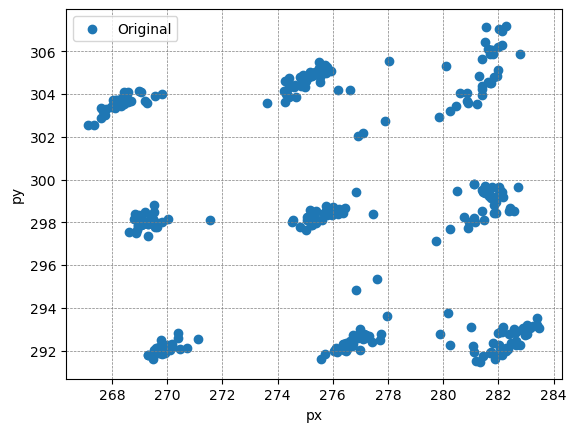

In [241]:
test_subject = 'test_subject_1'
test_subject = 'mads'
trial = '20250901_T0'
pattern = 'grid'

pupil_coordinates =f'../W02/sessions/{test_subject}/{trial}/{pattern}/frames/pupil_coordinates.csv'
mean_pupil_coordinates = f'../W02/sessions/{test_subject}/{trial}/{pattern}/mean_pupil_coordinates.csv'


pupil_coor= filtering_util.load_csv1(pupil_coordinates)


filtering_util.plot_pupil_coor(pupil_coor['px'], pupil_coor['py'], 'Original')
plt.show()

The next task involves visualizing the pupil coordinates signals `px`
 and `py`
 for the gaze `grid`
 pattern. In this task, a $1D$ Gaussian filter will be applied to smooth the signals individually. [Figure 2](#gauss) illustrates the Gaussian $1D$ filters and the corresponding filtered signal. The cell below convolves a Gaussian filter to gaze data. 
<div class="has-text-centered">
<figure class="image is-inline-block" id="gauss">

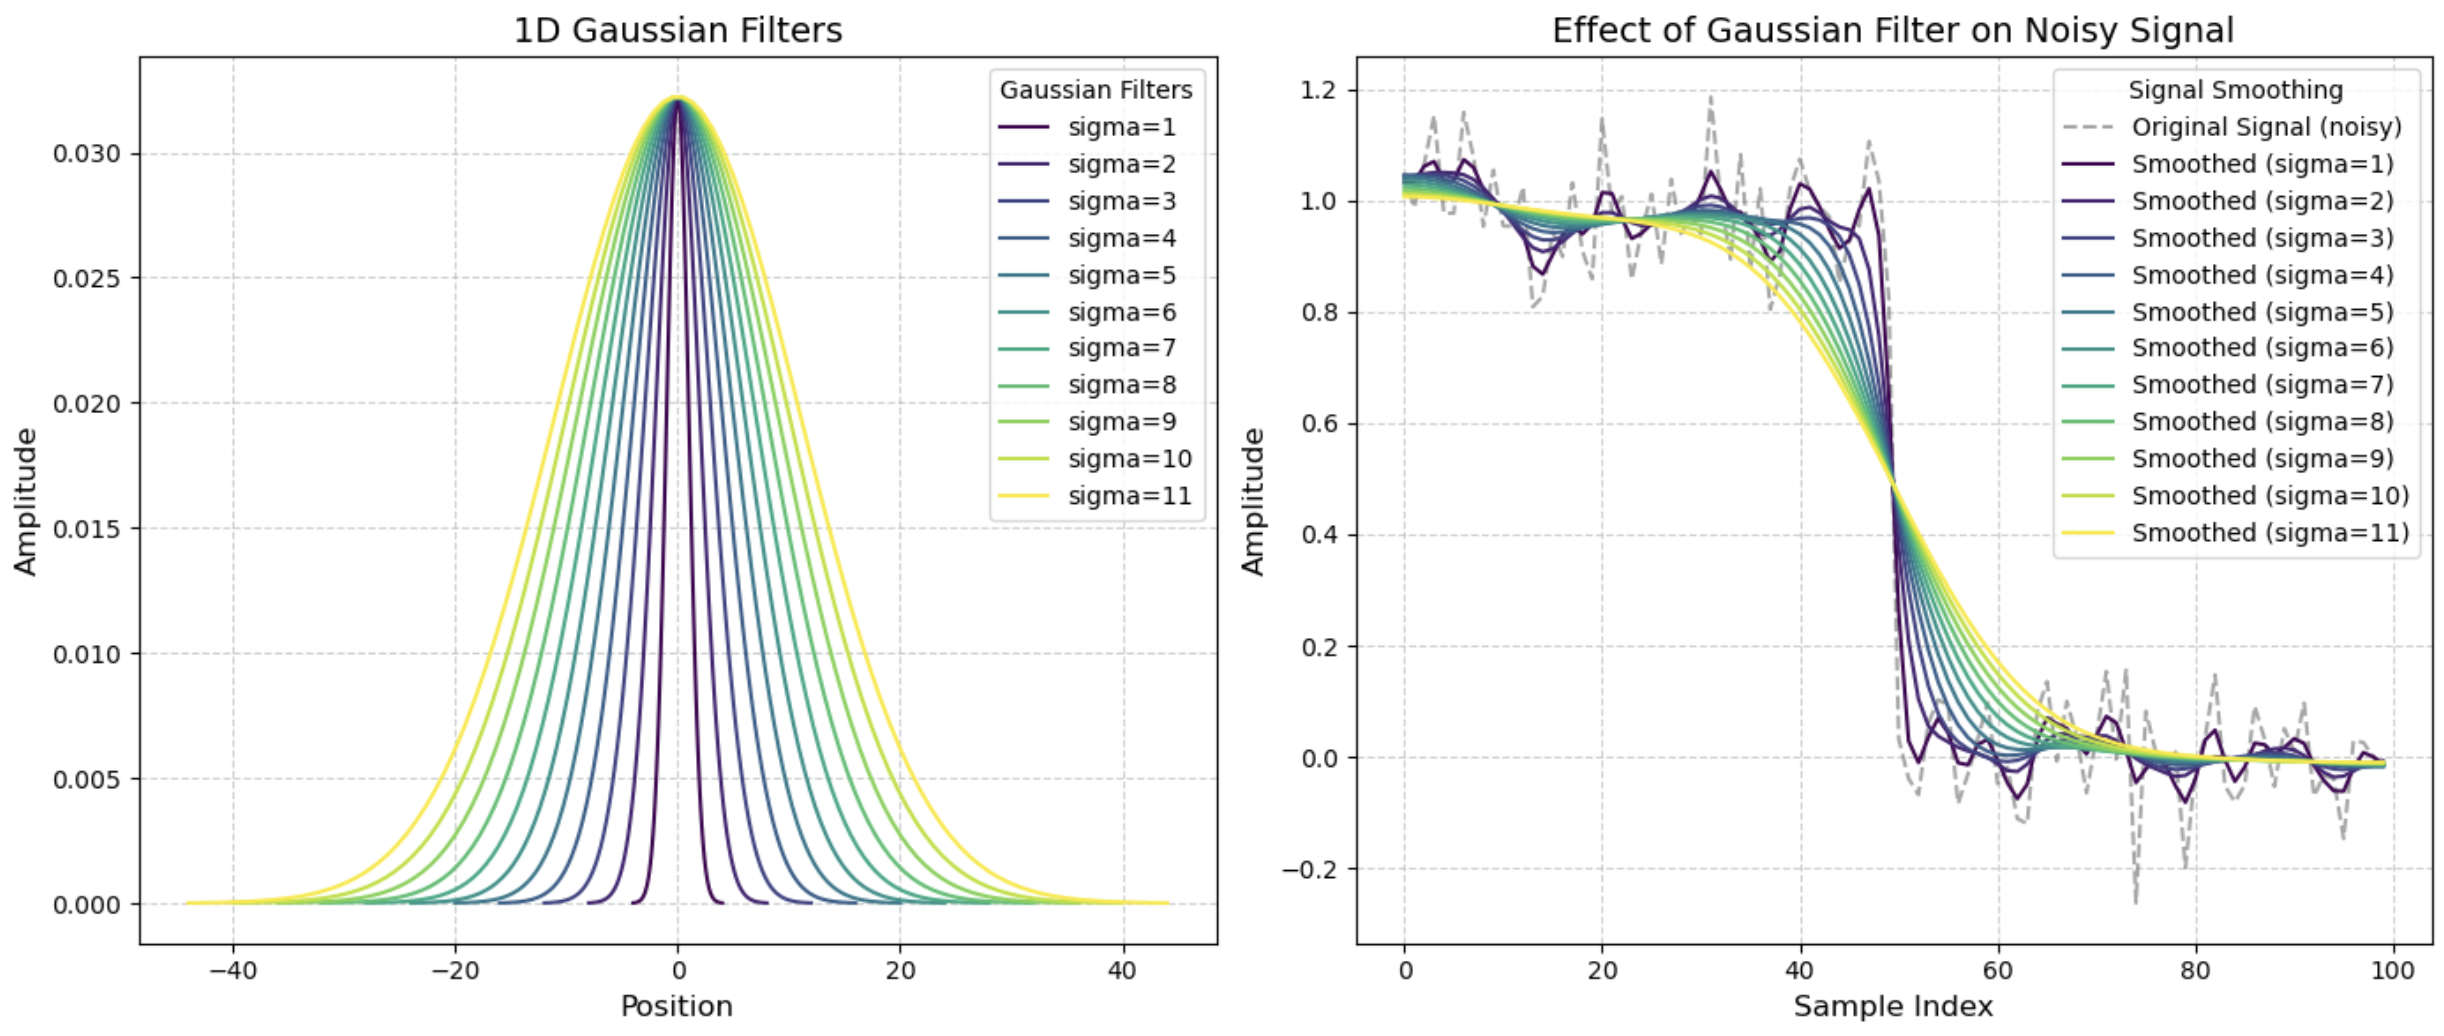

<figcaption class="figure-caption has-text-centered">Figure 2: Left: Shows the shape of the Gaussian filter for each value of sigma. Right: Demonstrates the effect of smoothing the noisy signal with each Gaussian filter.
</figcaption>
</figure>
</div>

---
**Task 2 (easy): Gaussian filter💡📽️**
1. Explain what is a Gaussian filter and how Gaussian filters can be applied to the data.
2. Reflect on the effect of applying a Gaussian filter to the data and how this can affect the subsequent proccessing of the gaze signal.


---

1/2. A gaussian filter/blur can be used to smooth out the pixel values, making edge detection easier.
2. 


---
**Task 3 (easy): Implementing gaussian filter👩‍💻**
1. Study the function `convolve_gauss`
 in the cell below.
2. Apply a Gaussian filter to the gaze data individually for `px`
and `py`
 signals. Use the function `plot_x_and_y`
 from `filtering_util.py`
 to visualize the result.    - The function takes two arrays of data as parameters.




---

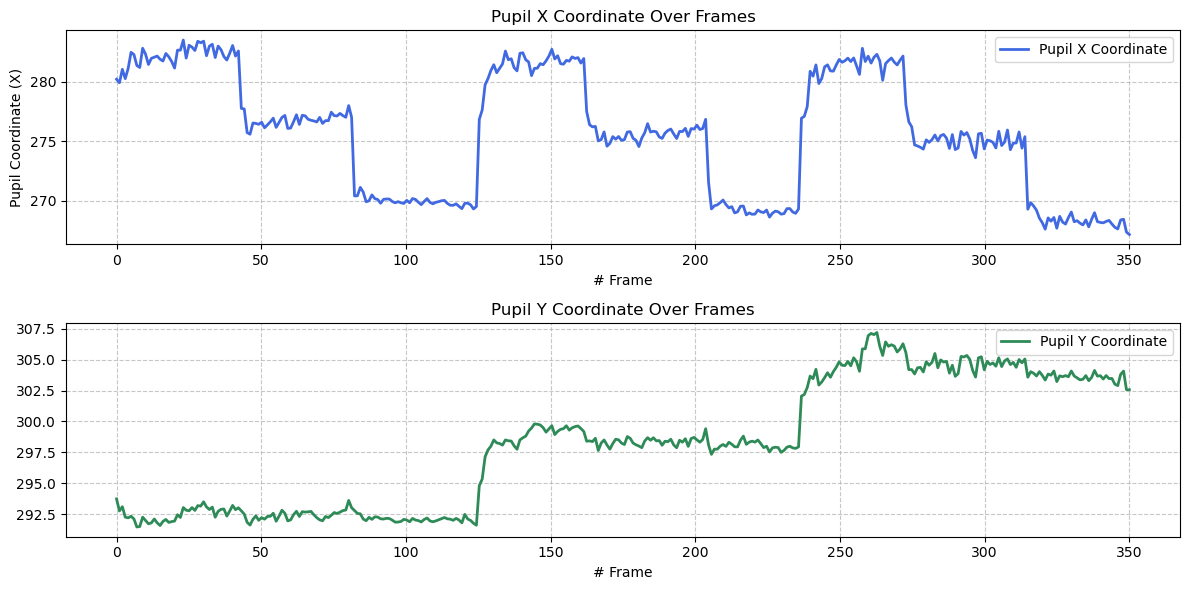

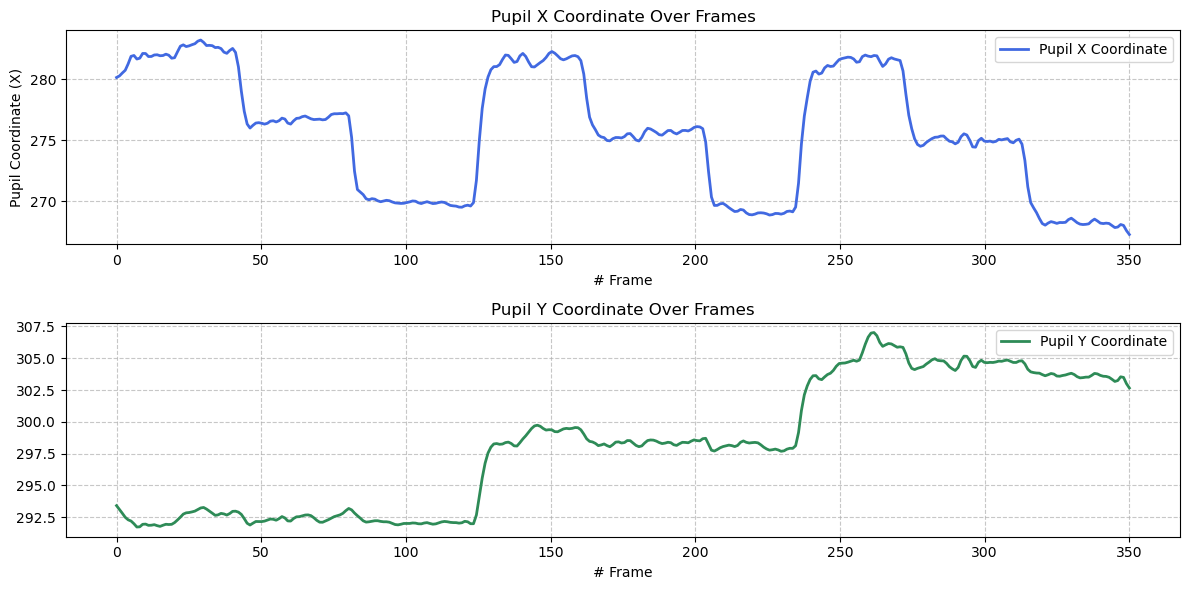

In [242]:
def convolve_gauss(data, sigma = 1):
    filtered = gaussian_filter1d(data, sigma=sigma, order = 0)
    return filtered


sigma = 1
px = np.asarray(pupil_coor['px'])
py = np.asarray(pupil_coor['py'])

# Write your implementation
filtered_x = convolve_gauss(px, sigma)
filtered_y = convolve_gauss(py, sigma)
filtering_util.plot_x_and_y(px, py)
filtering_util.plot_x_and_y(filtered_x, filtered_y)


---
**Task 4 (easy): Reflect on applying gaussian filter👩‍💻💡**
1. Characterize the signal and the noise. 
2. Experiment with the `sigma`
 parameter, which value of sigma removes the noise, but maintains the signal? 
3. Explain the effect of changing `sigma`
 on the data.
4. For which value of `sigma`
 does the important features of the signal start to disappear?


---

1. The signal is applying a constant offset at each step while the noise contributes to the variance at each step.
2. A sigma of 5 seems to preserve the signal while removing noise.
3. The sigma seems to lower the variance of each point.
4. At a sigma of 10 the x features seem to average out removing the important "step like" appearance.

## Partials derivatives

---
**Task 5 (easy): Partial derivatives💡📽️**
1. Recall from the lecture the partial derivatives of a signal calculated by convolving using the filter `[-1, 1]`
. What would be the result of convolving with a derivative filter on data that has been smoothed by a Gaussian filter? Use the following questions to guide your answers:    - Why does this filter find the derivative of the signal?
    - Which information is gained by applying such filter to gaze data?
    - How can the output be used for further processing?
    - What is the influence of the `sigma`
 value in the Gaussian the filter when finding the partial derivatives?




---

If we calculate the partial derivatives of a signal we get a signal which shows where the slope of the signal is 0 i.e. the gaze is fixed. This can be used to find where the signal stabilizes, i.e. we can programatically figure out where the subject is looking.

The following task is about implementing a method to find derivatives a signal using the filter $[-1, 1]$. 
The function `plot_x_and_y_complete`
 from `filter_util.py`
 takes two dictionaries one for each coordinates and plots the signals. The dictionaries should contain keys value pairs of the original and processed signal. 

---
**Task 6 (easy): Calculate the derivatives👩‍💻**
1. Complete the function `get_partial_derivatives`
 to apply the derivative filter to a signal and return the absolute value of the result. Use [np.convolve](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html)
 for convolution. The **absolute value** of the derivative is used as only the rate of change is of interest. 


---

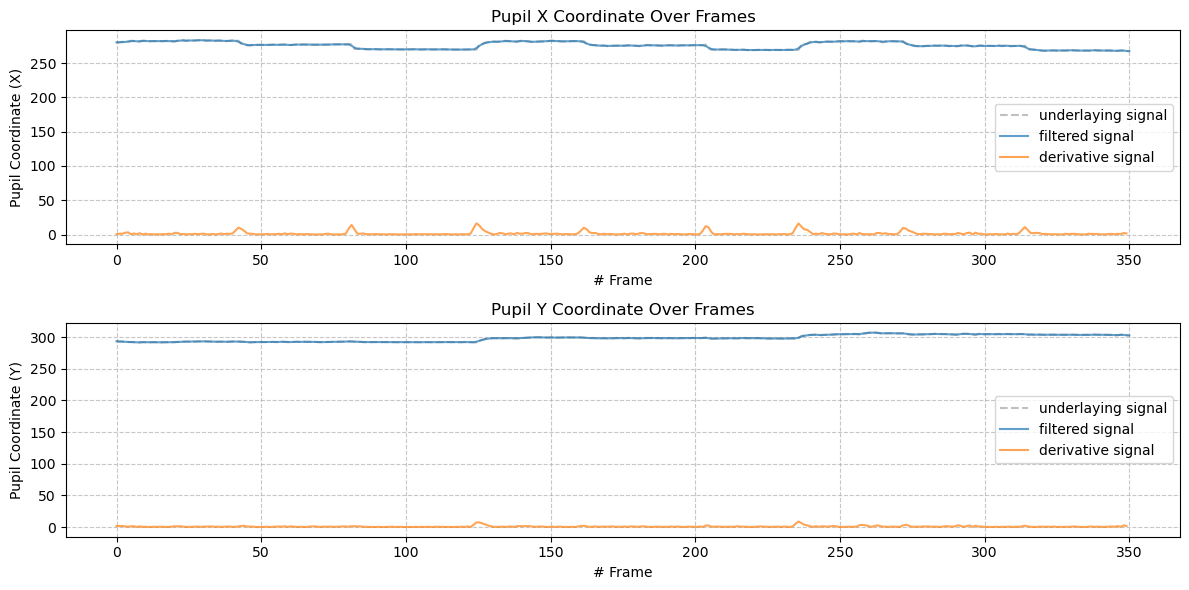

In [243]:
def get_partial_derivatives(data):
    """
    Convolve 1D data with a [-1, 1] filter.

    Args:
        data (numpy array): 1D array of data.

    Returns:
        numpy array: Convolved result.
    """
    #kernel = np.array([-1, 1])
    #return np.abs(np.convolve(data, kernel, mode='valid'))
    pairs_np_array = np.stack((data[:-1], data[1:]), axis=1)
    return np.abs(pairs_np_array@np.array([-1,1]).reshape(-1))

der_x = get_partial_derivatives(filtered_x)
der_y = get_partial_derivatives(filtered_y)

x_collected = {'underlaying': px, 'filtered': filtered_x, 'derivative': der_x}
y_collected = {'underlaying': py, 'filtered': filtered_y, 'derivative': der_y}

filtering_util.plot_x_and_y_complete(x_collected, y_collected)


---
**Task 7 (easy): Derivatives of a signal💡📽️**
1. Inspect the plots above and reflect on the relation between the original signals, the filtered and the derivative of the filtered signals. In your reflections you may include:    - What charateristics in the gaze data do the peaks and plateaus encapsulate, use the data collection session to elaborate. 
    - What behaviour is expected for the `x`
 coordinate of the pupil?
    - What behaviour is expected for the `y`
 coordinate of the pupil?
    - What would happen with these if if the pattern was changed?




---

The following task are about detecting events (fixations and saccades) in eye signals using derivative filters.

---
**Task 8 (easy): Saccade detection👩‍💻**
1. Complete the function `saccade_detection`
. The function should identify indices for _saccades_ (large eye movements) using the derivatives of the smoothed signal.
2. Use the function `saccade_detection`
 to detect saccades in `der_x`
 and `der_y`
.


---

In [244]:
def saccade_detection(signal, threshold=3.0):
    """
    Saccade detection: 
        Mark indices where the signal exceeds a threshold.

    Parameter:
        signal (list): derivative signal
        threshold (float): threshold marking a spike in the signal
    

    return: list of saccade indices
    """
    
    saccades = []
    for i, v in enumerate(signal):
        if v > threshold:
            saccades.append(i)
    return saccades

threshold = 0.9
x_saccades = saccade_detection(der_x, threshold)
y_saccades = saccade_detection(der_y, threshold)
print(y_saccades)

[124, 125, 126, 234, 235, 236]



---
**Task 9 (easy): Saccade detection👩‍💻**
1. Run the cell below to visualize the detected saccades.


---

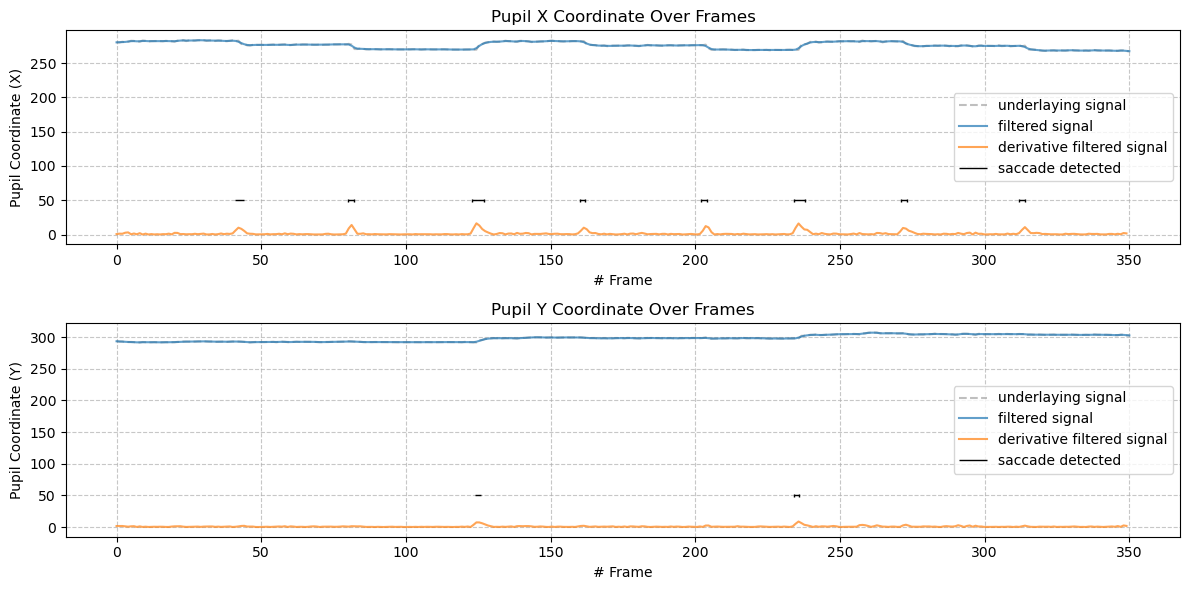

In [245]:
x_saccade = {'underlaying': px, 'filtered': filtered_x, 'derivative filtered': der_x, 'saccade': x_saccades}
y_saccade = {'underlaying': py, 'filtered': filtered_y, 'derivative filtered': der_y, 'saccade': y_saccades}

filtering_util.plot_x_and_y_complete(x_saccade, y_saccade)


---
**Task 10 (easy): Fixation detection👩‍💻**
This task is about using the saccades to identify individual fixation points.
1. Complete the function `fixation_filtering`
. The function should use the output of the `saccade_detection`
 to remove all saccades by overwriting the saccade indices with the latest known fixation point.

**Note:** This may not be the most optimal way of handling saccades, but it serves the purpose of this exercise

`fixation_filtering`
`get_partial_derivatives`
`saccade_detection`

---

In [246]:
def remove_saccades(ps, sacc, res = []):
    latest_valid = None
    for idx, p in enumerate(ps):
        if idx not in sacc:
            latest_valid = p
            res.append(p)
        elif latest_valid is not None:
            res.append(latest_valid)
    return res
def fixation_filtering(px, py, x_saccades, y_saccades):
    """
    Removes saccades from the input data based on detected indices for saccades. If a spike is detected
    at a given index, the previous valid vafixationlue is used to replace the current value.
    Parameters:
        px (1 x N nupy array): Representing the x coordinates (input signal).
        py (1 x N nupy array): Representing the y coordinates (input signal).
        x_saccades (list): A list of indices where saccades are detected in the x direction.
        y_saccades (list): A list of indices where saccades are detected in the y direction.
    Returns:
    px_new (list): A list of the cleaned x coordinates.
    py_new (list): A list of the cleaned y coordinates.
    """
    px_cleaned = []
    py_cleaned = []
    remove_saccades(px, x_saccades, px_cleaned)
    remove_saccades(py, y_saccades, py_cleaned)
    return px_cleaned, py_cleaned



threshold = 3
cleaned_px, cleaned_py = fixation_filtering(px, py, x_saccades, y_saccades)
cleaned_px, cleaned_py = fixation_filtering(filtered_x, filtered_y, x_saccades, y_saccades)
der_x_cleaned = get_partial_derivatives(cleaned_px)
der_y_cleaned = get_partial_derivatives(cleaned_py)
x_saccades_cleaned = saccade_detection(der_x_cleaned, threshold)
y_saccades_cleaned = saccade_detection(der_y_cleaned, threshold)


---
**Task 11 (easy): Visualization of signals👩‍💻**
1. Run the cell below to visualize the fixations and saccades.


---

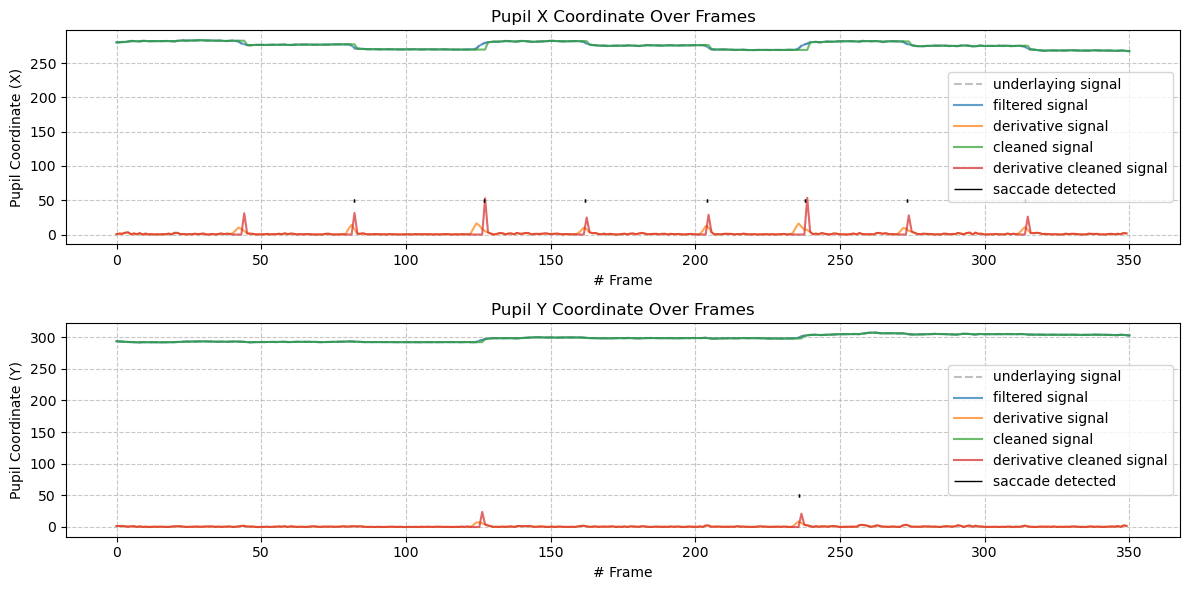

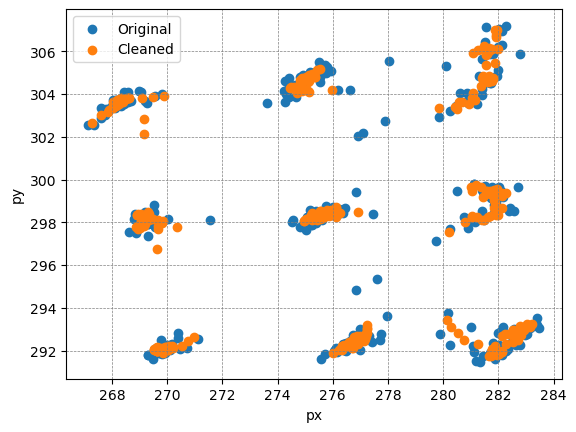

In [247]:
x_collected['cleaned'] = cleaned_px
y_collected['cleaned'] = cleaned_py

x_collected['derivative cleaned'] = der_x_cleaned
y_collected['derivative cleaned'] = der_y_cleaned

x_collected['saccade detected'] = x_saccades_cleaned
y_collected['saccade detected'] = y_saccades_cleaned

filtering_util.plot_x_and_y_complete(x_collected, y_collected, 5) #5 is a scaling factor on the values of the derivative for display purposes
filtering_util.plot_pupil_coor(px, py, 'Original')
filtering_util.plot_pupil_coor(cleaned_px, cleaned_py, 'Cleaned')
plt.show()


---
**Task 12 (easy): Noise handling during fixations💡📽️**
1. Reflect on the assumptions of your method for handling noise during fixations in [Task 10](#fixations1). What are the advantages and limitations of your approach if any?
2. Reflect on other strategies that you could use for handling the noise and outliers in the gaze data.


---

1. I am utilizing the same filtered data, this has the limitation of perhaps leaving out important data points, however we get more distinct saccade detection.
2. Instead of applying the gaussian filter we could utilize averages between each saccade.

The next step is to utilize the charateristics of the derivative of the smoothed signal to detect the frames (pupil coordinates) corresponding to each screen calibration point, so the data can be sorted in corresponding input and label pairs.

---
**Task 13 (easy): Frame grouping👩‍💻**
1. Complete the function `get_frames_pupil_movement`
. The function should construct a dictionary where the keys represent the calibration point numbers (e.g., '0', '1', ..., '8'), and the associated values are tuples consisting of the start and end frame indicies.
2. Use the function `get_frames_pupil_movement`
 to determine the sections pupil corrdinate sections belonging to each calibration coordinate.


---

[44, 82, 127, 162, 204, 238, 273, 314]


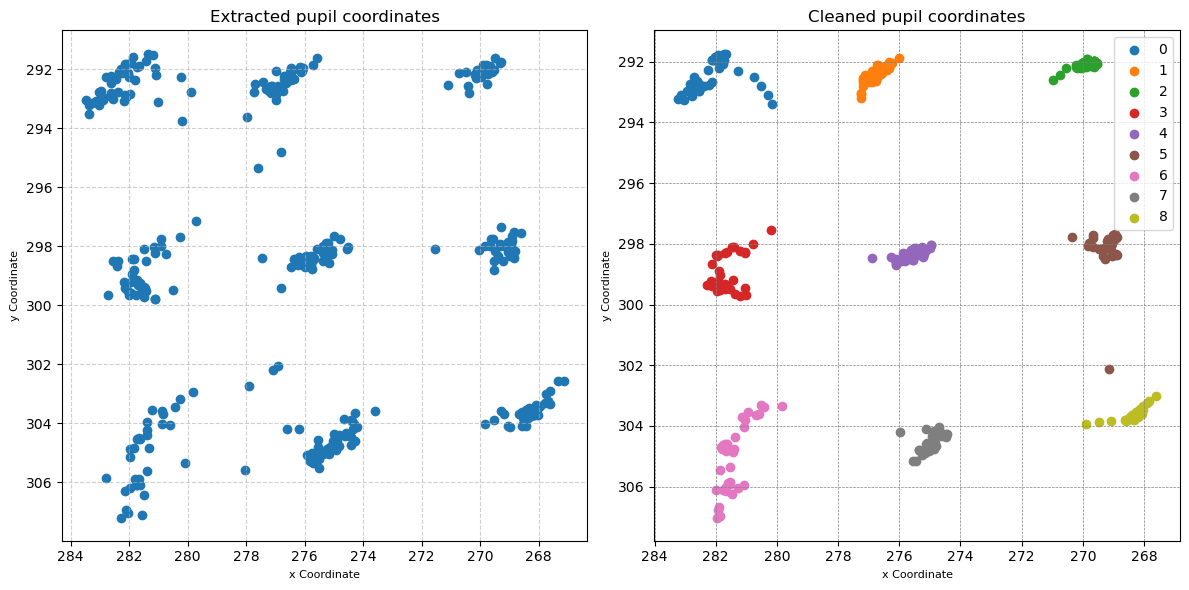

In [248]:
def get_frames_pupil_movement(cleaned_der, data):
    """
    Identifies segments of pupil movement based on changes in the cleaned derivative.
    Parameters:
        cleaned_der (list or numpy array): A 1D array of the derivative values of the cleaned data, indicating changes in pupil position over time.
        data (list or numpy array): The original data corresponding to the pupil movement.

    Returns:
        dict ( {string: tuple(int, int)} ): A dictionary where the keys are calibration point numbers (as strings) and the values are tuples
              containing the start and end frame numbers for each segment.
    """
    der_x_cleaned = [x for x, _ in cleaned_der]
    der_y_cleaned = [y for _, y in cleaned_der]
    x_saccades = saccade_detection(der_x_cleaned, threshold)
    y_saccades = saccade_detection(der_y_cleaned, threshold)
    print(x_saccades)

    x_saccades.append(len(der_x_cleaned))

    prev = 0
    frames = {}
    for i,sacc in enumerate(x_saccades):
        frames[f"{i}"] = (prev, sacc)
        prev = sacc+1

    return frames

frames = get_frames_pupil_movement(list(zip(der_x_cleaned, der_y_cleaned)), list(zip(px, py)))

filtering_util.plot_pupil_coordinates(frames, px, py, cleaned_px, cleaned_py)

## Analyzing results
In the following task the results of the filtering will be compared to the fixation identification made by the data collection script.

---
**Task 14 (easy): Analyse results👩‍💻**
1. Complete the function `evaluate_fixations_accuracy`
. The function should evaluate the fixation intervals from the filtering the signal, with the fixation noted during the datacollection. 
**Note:** During data collection, the frames are stored with naming `xx_yyyyyy.jpg`
 where xx marks the fixation the gaze in the frame belongs to.


2. Run the cell below to assess the performance of the filtered gazesignal separating fixation. 


---

Sample-level accurracy points:  0.9571428571428572
Sample-level accurracy intervals:  0.5555555555555556


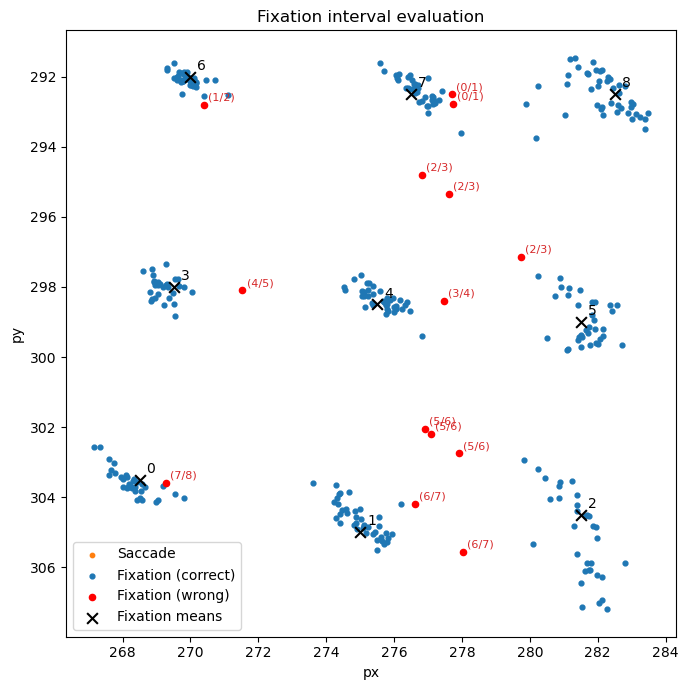

In [249]:
def evaluate_fixations_accuracy(pupil_csv_path, frames_interval):
    """
    Evaluate sample-level accuracy of predicted fixation intervals.

    Parameters:
    csv_path : str
        Path to CSV file with pupil data. Must contain 'image' column
        where the first two characters encode the true fixation ID.
    frames_interval : frames dict
        Mapping of predicted fixation IDs to index ranges,
        e.g. {'0': (0,42), '1': (44,85), ...}.

    Returns:
    None
        Prints the sample-level accuracy (float between 0 and 1).
    """
    df = pd.read_csv(pupil_csv_path)
    fixation_points = df['image'].str[:2].astype(int)
    df['true_fix'] = fixation_points
    fixation_points = list(fixation_points)


    total_correct = 0
    total_count = len(fixation_points)
    interval_matches = 0
    interval_total = len(frames_interval)

    for i in list(set(fixation_points)):
        start, end = frames_interval[f"{i}"]
        correct = 0
        for j in fixation_points[start:end]:
            if j == i: correct+=1
        total_correct += correct
        if correct == end-start:
            interval_matches += 1

    print("Sample-level accurracy points: ", total_correct/total_count)
    print("Sample-level accurracy intervals: ", interval_matches/interval_total)
        





evaluate_fixations_accuracy(pupil_coordinates, frames)

filtering_util.plot_fixation_eval(pupil_coordinates, frames, mean_pupil_coordinates)


---
**Task 15 (easy): Evaluate👩‍💻**
1. Inspect accuracy and the plot. Describe the points that were misclassified. Reason about the cause of the missclassification.


---

In [250]:
# Write your reflections here...

## Inspecting own data

---
**Task 16 (medium): Combined signal👩‍💻💡**
1. Go back to [Task 1](#task_load_data) and update the folder path to target the `grid`
 pattern of your own data.
2. Rerun the steps above.
3. Reflect on how well does the method generalizes to this dataset. You may use the following questions to guide your answers?    - How do the results differ from the ones of `test_subject_1`
?
    - Is it possible to reuse the same parameters or do they need to be updated?
    - Has the experimental setup any influence on the methods ability to generalizable? Why/why not?




---

In [251]:
# Write your reflections here...

## Event detection using gradients
In this task you will explore the combined signal (changes in x and y direction simultainously) and use the gradient for event detection. Recall the definition for the gradient of the function $f(x,y)$:

$$

\nabla f(x, y) = \left( \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right)


$$

You will use the gradient magnitude, the length of the gradient defined by:

$$
||\nabla f(x, y)|| = \sqrt{\Big(\frac{\partial f(x,y)}{\partial x}\Big)^2 + \Big(\frac{\partial f(x,y)}{\partial y} \Big)^2}
$$

---
**Task 17 (easy): Combined signal👩‍💻**
1. Complete the functions:    - `gradient_mangitude`
: The function should calculate the gradient magnitude of a $2D$ signal given `x`
 and `y`
.




---

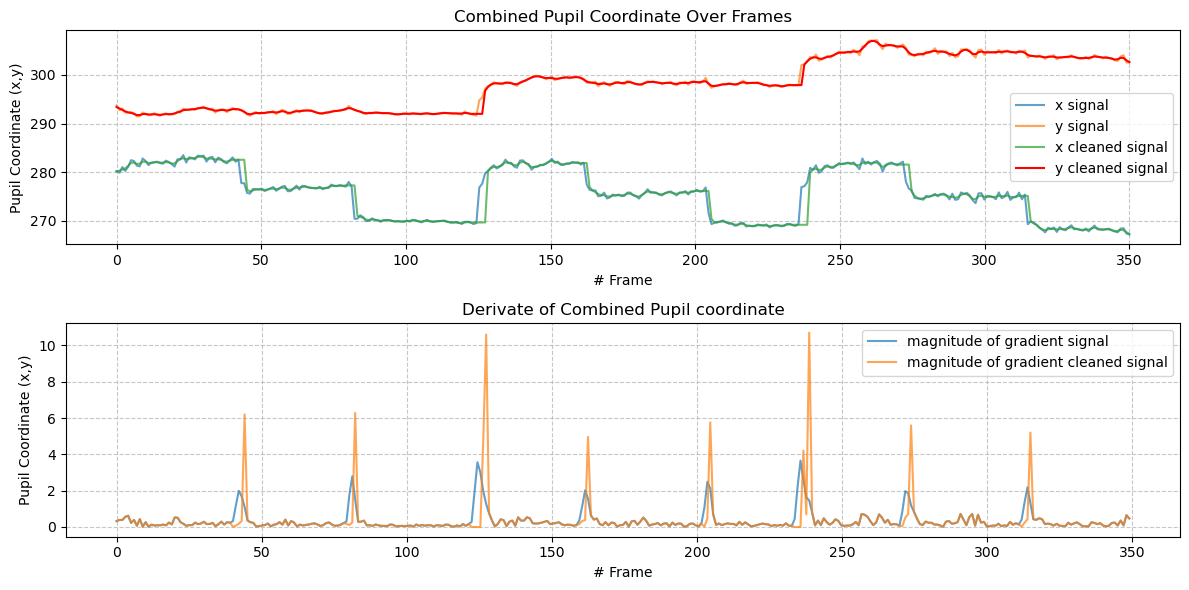

In [252]:
def gradient_mangitude(x,y):
    """
    Calculates the gradient mangitude in a 2D space.
    Args:
        x (N x 1 numpy array): Array of x coordinates.
        y (N x 1 numpy array): Array of y coordinates.
    
    Returns:
        (N x 1 numpy array): The Euclidean distance from the origin to the point (x, y).
    """
    return np.sqrt(x**2+y**2)

magnitude = gradient_mangitude(der_x, der_y)
magnitude_cleaned = gradient_mangitude(der_x_cleaned, der_y_cleaned)

collected_signal = {}
collected_magnitude = {}
collected_signal['x'] = px
collected_signal['y'] = py
collected_signal['x cleaned'] = cleaned_px
collected_signal['y cleaned'] = cleaned_py
collected_magnitude['magnitude of gradient'] = magnitude
collected_magnitude['magnitude of gradient cleaned'] = magnitude_cleaned



filtering_util.plot_x_and_y_combined(collected_signal, collected_magnitude, 5) #5 is a scaling factor on the values of the derivative for display purposes


---
**Task 18 (easy): Reflect💡**
1. Reflect on the benefit of using the combined signal compared to using the two individual signals.


---

In [253]:
# Write your reflection here...